In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table, vstack
import pandas as pd
from astropy.io import ascii
import os 
import glob 

In [2]:
files = glob.glob("*.snana.txt")
for file in files:
    print(file)

2020koc_data.snana.txt
2020lrr_data.snana.txt
2020tfb_data.snana.txt
2020tly_YSEdata.snana.txt
2020tzs_data.snana.txt
2021sev_data.snana.txt
2021whv_data.snana.txt


In [3]:
def import_snana(filename):
    start_data = False
    table = None
    with open(filename) as f:
        for i,line in enumerate(f):
            if 'VARLIST' in line:
                header = line.split()
                header = header[0:9]
                dummy = [['X'*20]]*len(header)
                table = Table(dummy, names=header).copy()[:0]
            elif table is not None:
                data=line.split()
                data=data[0:9]
                if len(data)!=9:
                    break
                table.add_row(data)
    mask = np.array([r['MAGERR'] is not None for r in table])
    table = table[mask]
    table['MJD']    = table['MJD'].astype(float)
    table['FLT'] = table['FLT'].astype(str)
    table['FLUXCAL'] = table['MAGERR'].astype(float)
    table['FLUXCALERR'] = table['MAGERR'].astype(float)
    table['MAG'] = table['MAG'].astype(float)
    table['MAGERR'] = table['MAGERR'].astype(float)
    return(table)

In [12]:
jfo = import_snana('2020jfo_lightcurves')
koc = import_snana('2020koc_data.snana.txt')
lrr = import_snana('2020lrr_data.snana.txt')
tfb = import_snana('2020tfb_data.snana.txt')
tly = import_snana('2020tly_YSEdata.snana.txt')
tzs = import_snana('2020tzs_data.snana.txt')
sev = import_snana('2021sev_data.snana.txt')
whv = import_snana('2021whv_data.snana.txt')

In [13]:
dataset = vstack([jfo, koc, lrr, tfb, tly, tzs, sev, whv])
distinct_filters = set(dataset['FLT'])
distinct_filters

{'B',
 'F555W',
 'F814W',
 'U',
 'UVM2',
 'UVW1',
 'UVW2',
 'U_S',
 'V',
 'cyan-ATLAS',
 'g',
 'g-ZTF',
 'gp',
 'i',
 'i-N',
 'ip',
 'orange-ATLAS',
 'r',
 'r-ZTF',
 'rp',
 'up',
 'w',
 'y',
 'z'}

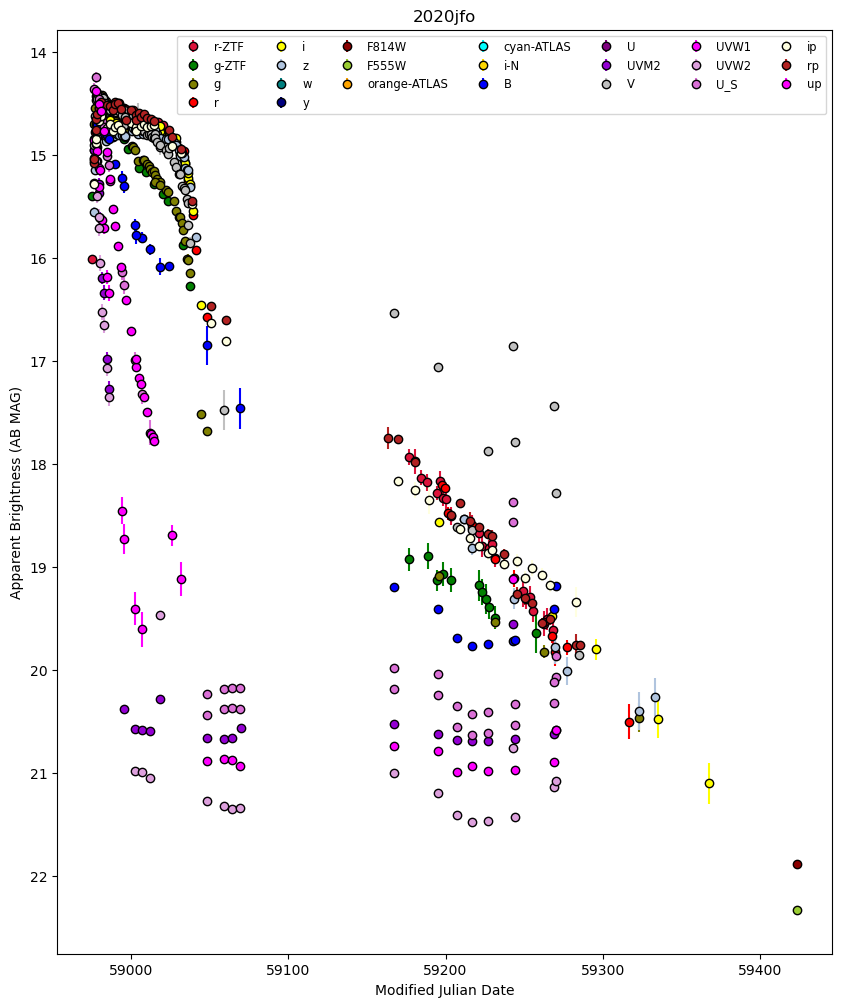

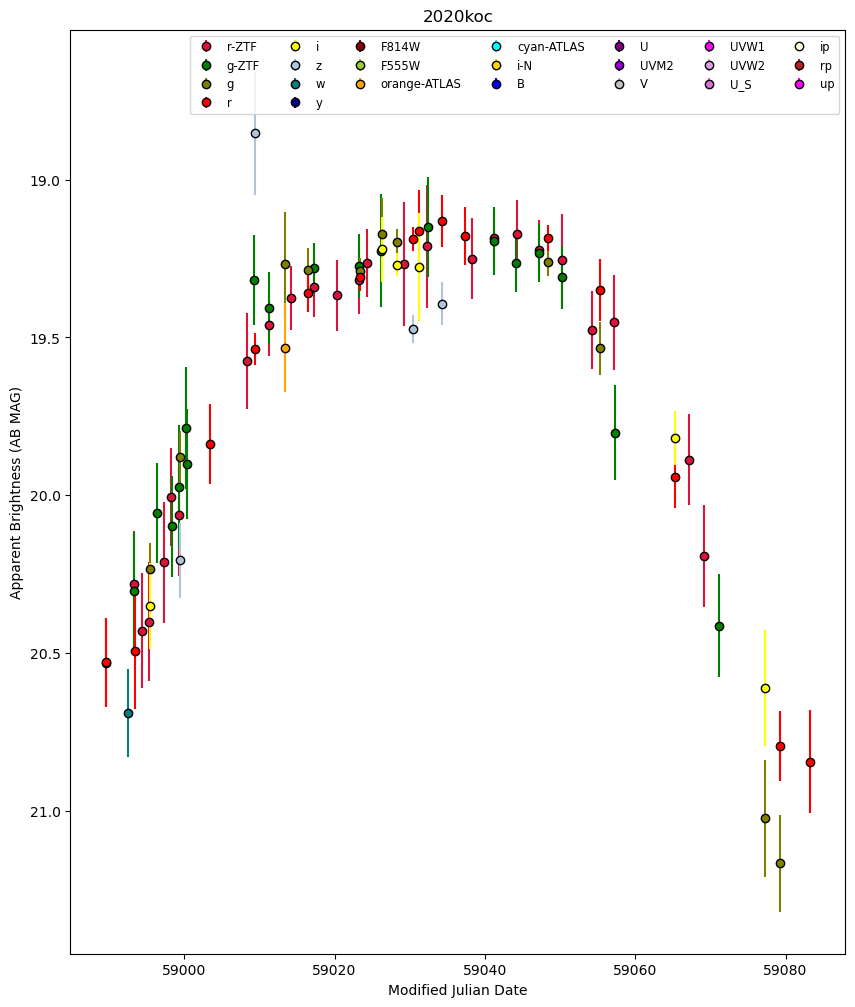

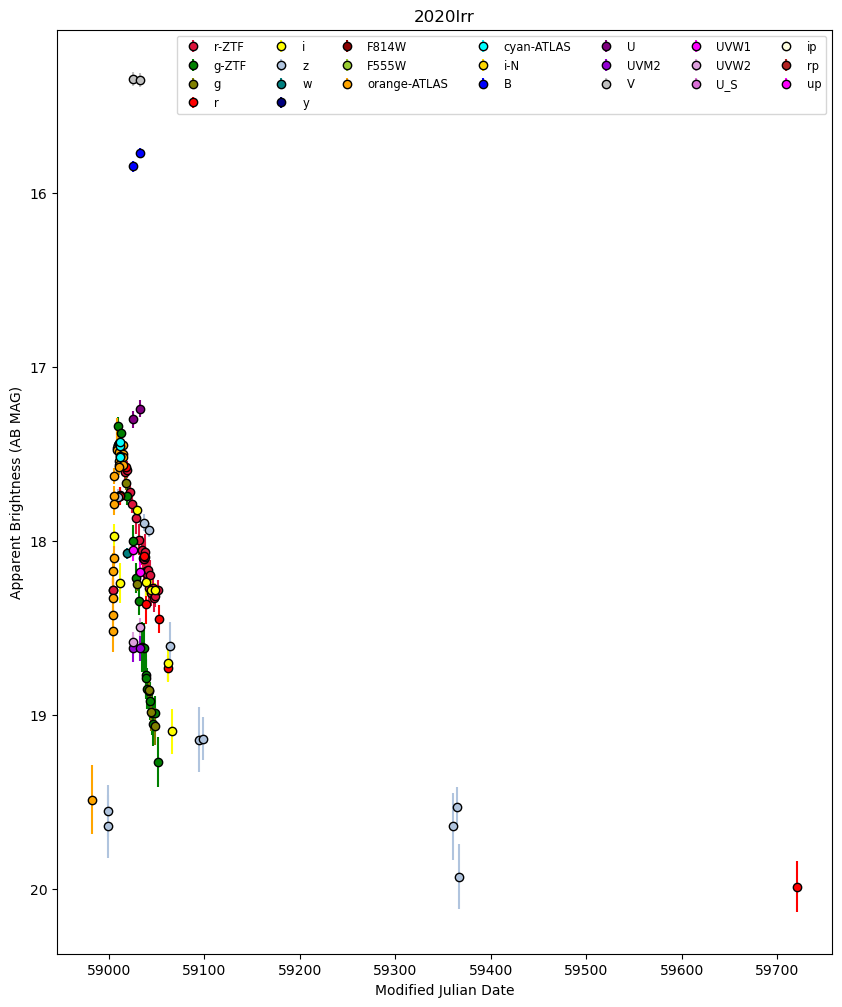

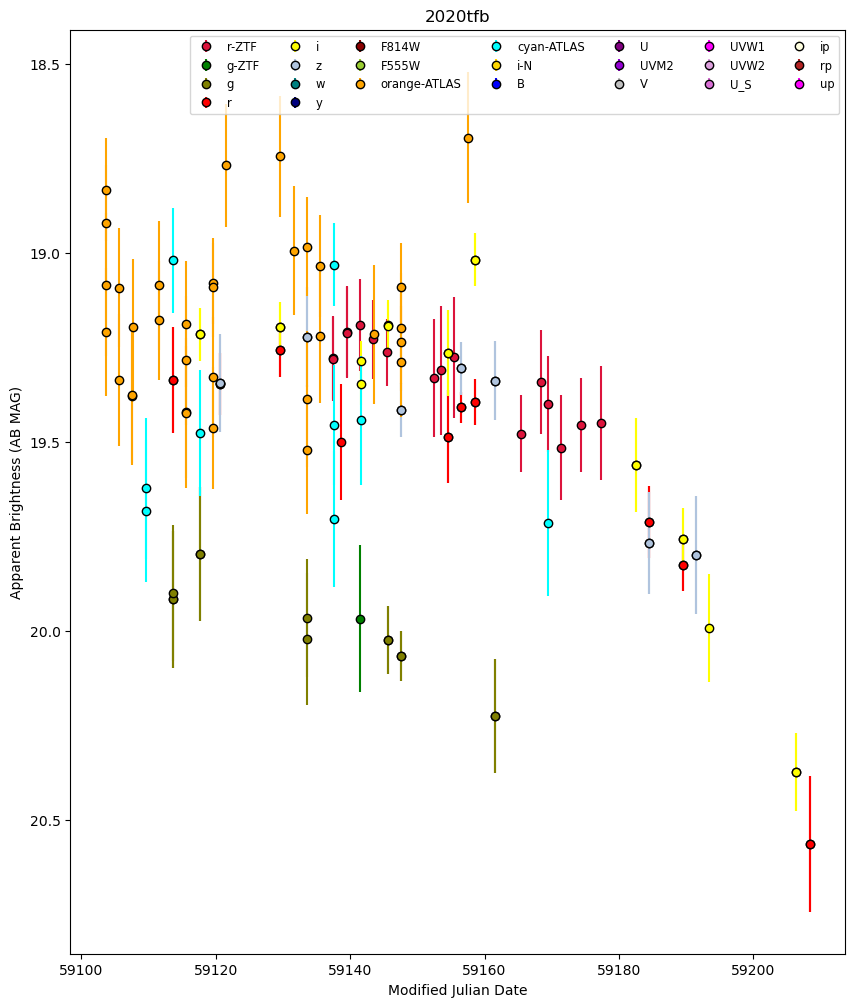

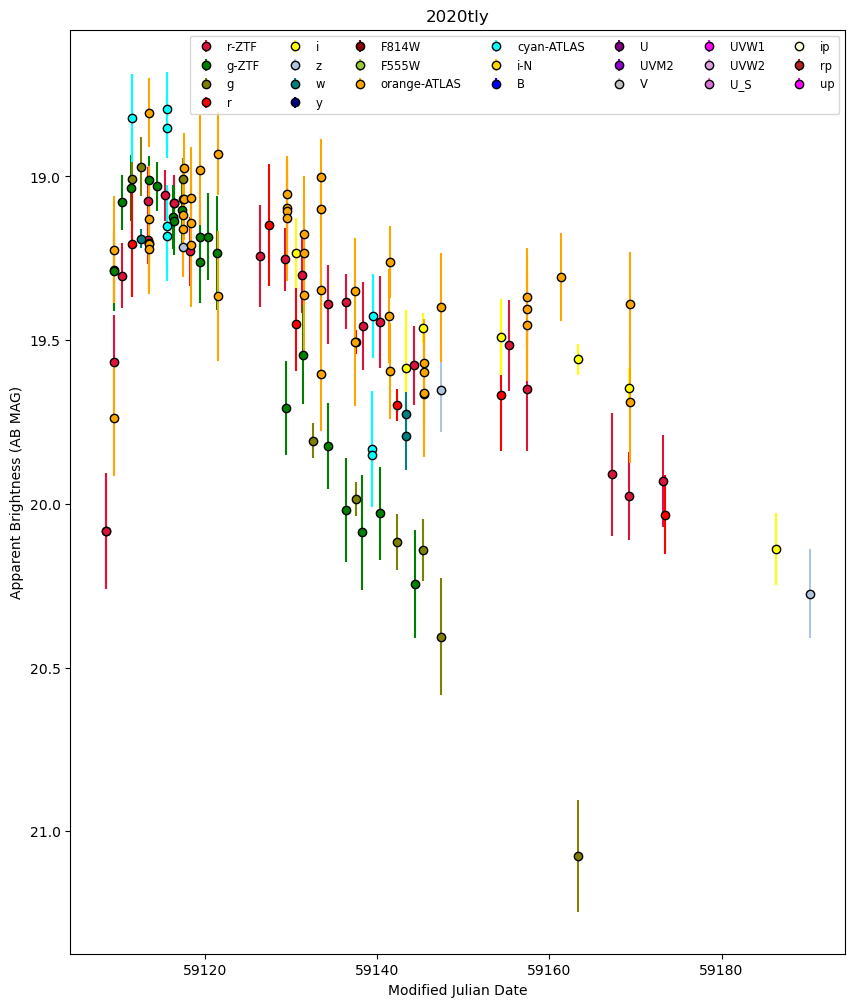

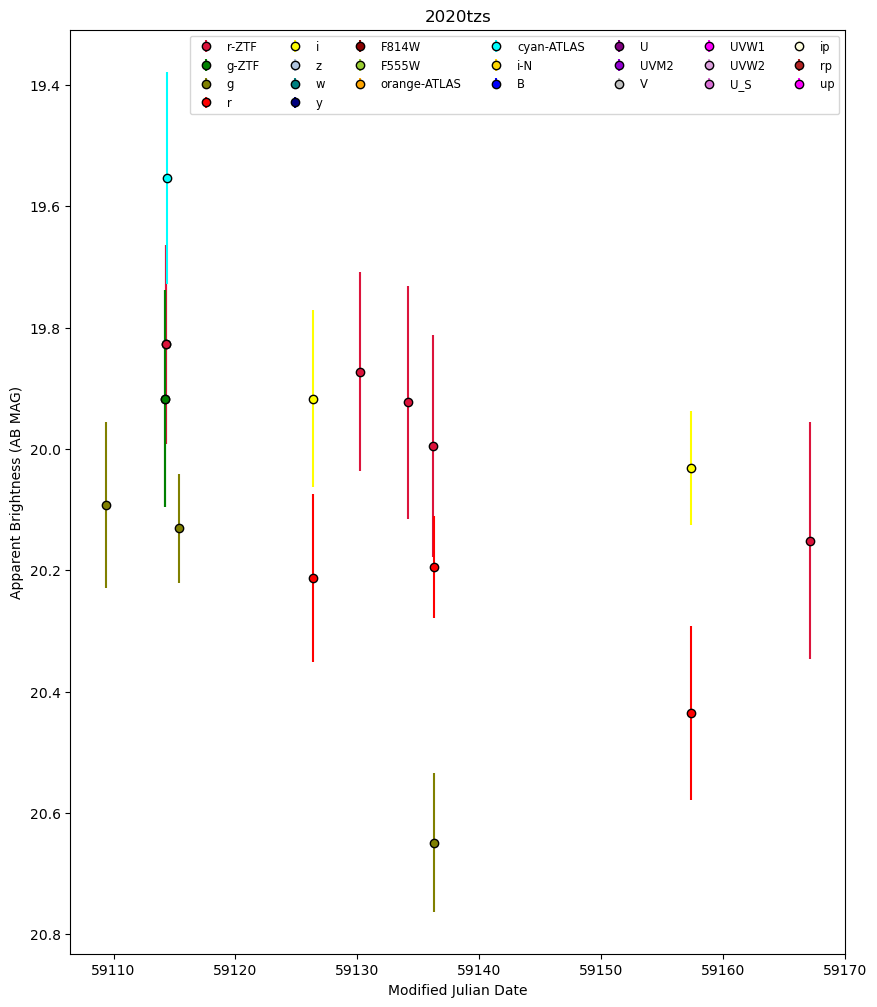

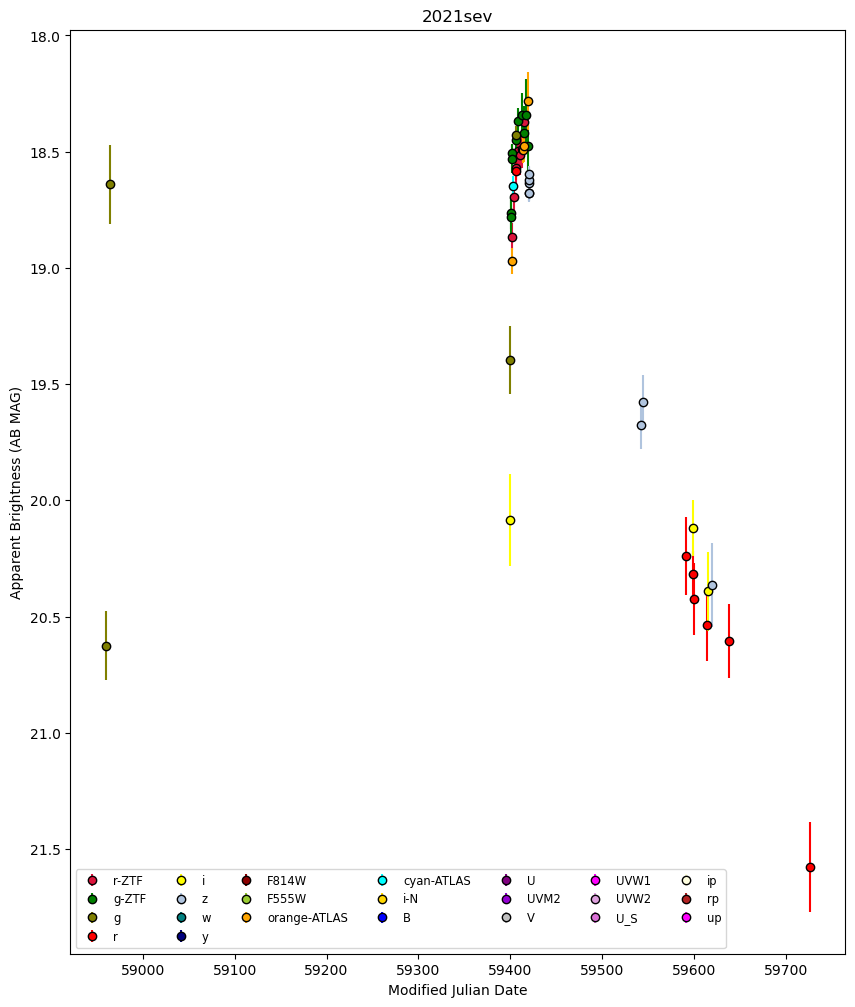

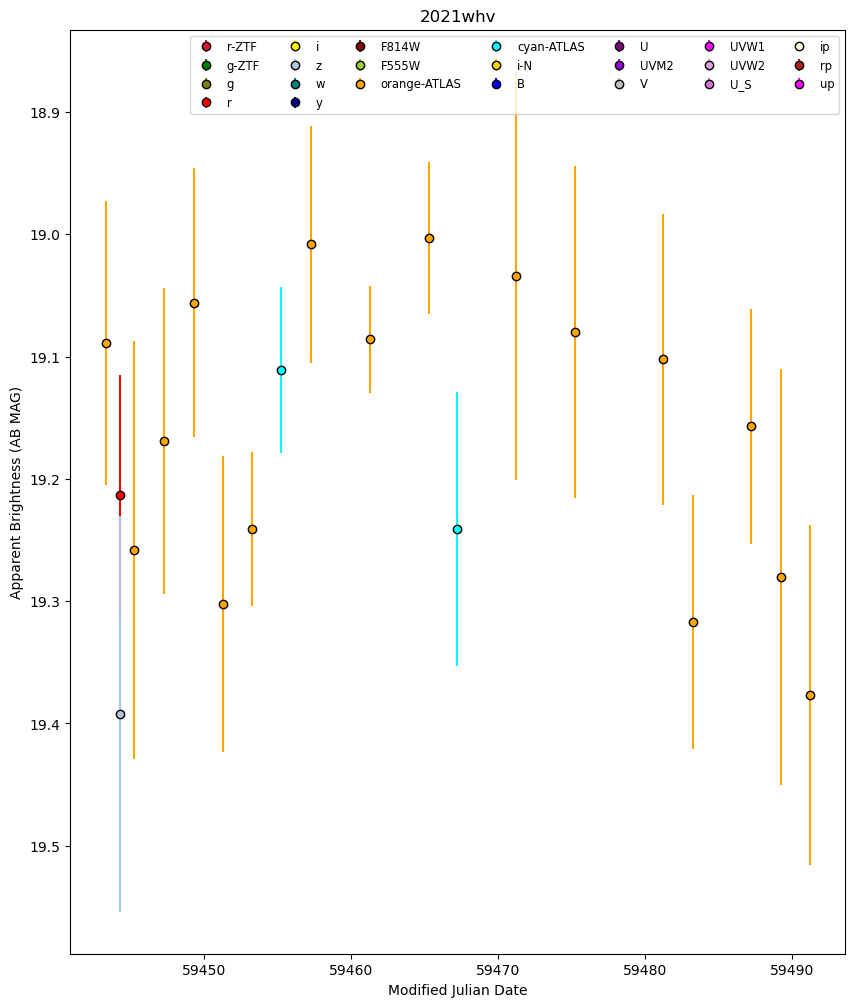

In [15]:
full_data_set = [jfo, koc, lrr, tfb, tly, tzs, sev, whv]
full_object_names = ['2020jfo', '2020koc', '2020lrr', '2020tfb', '2020tly', '2020tzs', '2021sev', '2021whv']
for idx, table in enumerate(full_data_set):
    plt.figure(idx)
    colors = {'B':'blue', 'F555W':'yellowgreen', 'F814W': 'darkred', 'U': 'purple', 'UVM2':'darkviolet', 'UVW1':'magenta', 'UVW2':'plum','U_S':'orchid', 'V':'silver',
          'cyan-ATLAS':'cyan', 'g-ZTF':'green','g':'olive', 'gp':'darkolivegreen', 'i':'yellow', 'i-N':'gold','ip':'lightyellow', 'orange-ATLAS':'orange', 
         'r':'red', 'r-ZTF':'crimson', 'rp':'firebrick', 'up':'fuchsia', 'w':'teal', 'y':'navy', 'z':'lightsteelblue' }
    PAN = {}
    ZTF = {}
    ATLAS = {}
    HST = {}
    GAIA = {}
    NICKEL = {}
    SWOPE = {}
    SWIFT = {}
    plt.rcParams['figure.figsize'] = (10,12)  
    for i, filt in enumerate(['r-ZTF', 'g-ZTF']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ZTF[filt] = l
    for i, filt in enumerate(['g', 'r', 'i', 'z', 'w', 'y']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        PAN[filt] = l
    for i, filt in enumerate(['F814W', 'F555W']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        HST[filt] = l
    for i, filt in enumerate([ 'orange-ATLAS', 'cyan-ATLAS']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ATLAS[filt] = l
    for i, filt in enumerate([ 'i-N']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        NICKEL[filt] = l
    for i, filt in enumerate(['B', 'U', 'UVM2', 'V', 'UVW1', 'UVW2', 'U_S']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWIFT[filt] = l
    for i, filt in enumerate(['ip', 'rp', 'up']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0 
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWOPE[filt] = l
    plt.gca().invert_yaxis()
    plt.title(full_object_names[idx])
    plt.xlabel('Modified Julian Date')
    plt.ylabel('Apparent Brightness (AB MAG)')
    plt.legend(ncol = 7, fontsize = 'smaller')
    


    

In [ ]:
# extrabol input only takes in .dat files with line 1 being redshift and line 2 being Milky Way E(B-V)
# format is TIME(MJD) APPARENT_MAGNITUDE ERROR(MAG) FILTER_SVO_ID MAG_SYSTEM
redshifts = [0.043, 0.005, 0.039, 0.0184, 0.058] 
full_data_set

[<Table length=347>
 VARLIST:    MJD     FLT  FLUXCAL FLUXCALERR   MAG    MAGERR MAGSYS  TELESCOPE 
  str20    float64  str20 float64  float64   float64 float64 str20     str20   
 -------- --------- ----- ------- ---------- ------- ------- ------ -----------
     OBS: 58954.387 g-ZTF   0.067      0.067  17.882   0.067   None         P48
     OBS: 58954.444 r-ZTF   0.075      0.075  18.263   0.075   None         P48
     OBS: 58955.404 g-ZTF   0.055      0.055   17.78   0.055   None         P48
     OBS: 58955.426 r-ZTF   0.065      0.065  18.111   0.065   None         P48
     OBS: 58956.343 r-ZTF   0.055      0.055  18.028   0.055   None         P48
     OBS: 58956.369 g-ZTF   0.032      0.032  17.617   0.032   None         P48
     OBS:  58961.41 r-ZTF   0.065      0.065  17.711   0.065   None         P48
     OBS: 58964.283 r-ZTF   0.048      0.048  17.795   0.048   None         P48
     OBS: 58964.345 g-ZTF    0.05       0.05  17.559    0.05   None         P48
     OBS: 58967.288 